## Training Random Forest Model

### Step 1 | Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from tune_clf_hyperparameters import tune_clf_hyperparameters
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings("ignore")

### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Tuning hyperparameters of model

In [4]:
# Create a baseline model
base_rf = RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth = None, max_features = 'sqrt', n_estimators = 900)

In [5]:
base_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=900, random_state=42)

In [6]:
y_pred = base_rf.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9320    0.9505    0.9412       505
           1     0.8626    0.8849    0.8736       617
           2     0.8207    0.7361    0.7761       485
           3     0.7885    0.8135    0.8008       504
           4     0.8891    0.8952    0.8921       582
           5     0.9664    0.9723    0.9693       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.9037      4152
   macro avg     0.8936    0.8927    0.8928      4152
weighted avg     0.9031    0.9037    0.9031      4152



In [5]:
# Define the space of hyperparameters
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 300, 600, 900],
    'max_depth': [None, 5, 10, 20], 
    'max_features': [None, 'sqrt'] # Here the number of feature is 19, then sqrt and log2 are the same values
}

In [6]:
# Hyperparameter tuning with pre-defined function
best_rf, best_rf_hyperparams, tuning_results = tune_clf_hyperparameters(base_rf, param_grid_rf, X_train, y_train)

In [7]:
# Print top 10 hyperparameters selection that gives top 10 accuracy score
tuning_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,46.302849,1.567031,1.127449,0.092901,entropy,None,sqrt,900,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.895846,0.896718,0.888287,0.900030,0.901536,0.896483,0.004599,1
9,35.254336,0.967226,1.114710,0.158229,gini,None,sqrt,900,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.895244,0.898826,0.887986,0.901536,0.898223,0.896363,0.004641,2
8,24.284812,0.908146,0.715225,0.105846,gini,None,sqrt,600,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.896448,0.897621,0.886781,0.902740,0.897621,0.896242,0.005207,3
37,70.106467,37.056146,2.560532,1.801229,gini,20,sqrt,300,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.896448,0.896417,0.887684,0.900030,0.900030,0.896122,0.004515,4
7,11.532093,0.841967,0.411280,0.065666,gini,None,sqrt,300,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.895244,0.897621,0.885878,0.902138,0.898826,0.895941,0.005501,5
39,104.316675,10.528201,1.132715,0.124384,gini,20,sqrt,900,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.896448,0.896116,0.887383,0.900030,0.899127,0.895821,0.004479,6
47,13.819170,0.430800,0.358457,0.070822,entropy,None,sqrt,300,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.894642,0.895815,0.887684,0.900030,0.900632,0.895761,0.004657,7
38,140.974431,6.642678,1.722457,1.933140,gini,20,sqrt,600,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.895244,0.896718,0.887986,0.900933,0.897922,0.895761,0.004314,8
79,45.935313,3.197389,0.927708,0.116937,entropy,20,sqrt,900,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.895545,0.897621,0.885276,0.898223,0.902138,0.895761,0.005660,9
73,115.356238,1.561402,0.620065,0.067763,entropy,20,None,600,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.890427,0.897320,0.892201,0.897922,0.900030,0.895580,0.003641,10


In [8]:
best_rf_hyperparams

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 900}

In [9]:
print(classification_report(y_train, best_rf.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2018
           1     1.0000    1.0000    1.0000      2465
           2     1.0000    1.0000    1.0000      1942
           3     1.0000    1.0000    1.0000      2018
           4     1.0000    1.0000    1.0000      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    1.0000    1.0000      3237

    accuracy                         1.0000     16606
   macro avg     1.0000    1.0000    1.0000     16606
weighted avg     1.0000    1.0000    1.0000     16606



In [10]:
y_predict = best_rf.predict(X_test)
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     0.9320    0.9505    0.9412       505
           1     0.8626    0.8849    0.8736       617
           2     0.8207    0.7361    0.7761       485
           3     0.7885    0.8135    0.8008       504
           4     0.8891    0.8952    0.8921       582
           5     0.9664    0.9723    0.9693       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.9037      4152
   macro avg     0.8936    0.8927    0.8928      4152
weighted avg     0.9031    0.9037    0.9031      4152



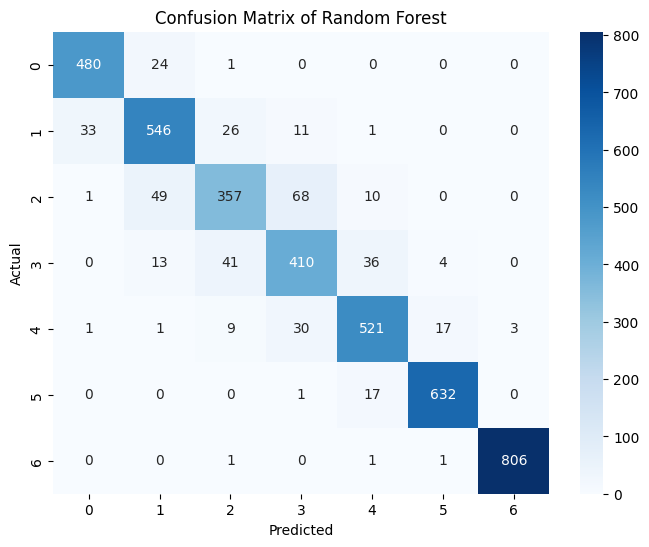

In [11]:
plot_confusion_matrix(y_test, y_predict, 'Confusion Matrix of Random Forest')

### Step 4 | Feature Selection Using Random Forest

#### Step 4.1 | Extracting selected feature from Random Forest

In [12]:
best_rf_feature_selection = SelectFromModel(RandomForestClassifier(criterion = 'entropy', max_depth = None, max_features = 'sqrt', n_estimators = 900), threshold = 'median')

In [13]:
best_rf_feature_selection.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 n_estimators=900),
                threshold='median')

In [14]:
selected_features = X_train.columns[(best_rf_feature_selection.get_support())]
len(selected_features)

10

In [15]:
selected_features

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'],
      dtype='object')

#### Step 4.2 | Retrain Random Forest with selected feature and hyperparameters

In [16]:
X_train_select = X_train[selected_features]
X_test_select = X_test[selected_features]


#fitting the model with the most importart features
best_rf_2 = RandomForestClassifier(criterion = 'entropy', max_depth = None, max_features = 'sqrt', n_estimators = 900)
best_rf_2.fit(X_train_select, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=900)

In [17]:
print(classification_report(y_train, best_rf_2.predict(X_train_select), digits=4))

              precision    recall  f1-score   support

           0     0.9946    0.9985    0.9965      2018
           1     0.9967    0.9943    0.9955      2465
           2     0.9948    0.9943    0.9946      1942
           3     0.9950    0.9950    0.9950      2018
           4     0.9983    0.9979    0.9981      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    1.0000    1.0000      3237

    accuracy                         0.9974     16606
   macro avg     0.9971    0.9972    0.9971     16606
weighted avg     0.9974    0.9974    0.9974     16606



In [18]:
y_predict2 = best_rf_2.predict(X_test_select)
print(classification_report(y_test, y_predict2, digits=4))

              precision    recall  f1-score   support

           0     0.9277    0.9406    0.9341       505
           1     0.8604    0.8590    0.8597       617
           2     0.7724    0.7278    0.7495       485
           3     0.7839    0.7917    0.7878       504
           4     0.8777    0.9003    0.8889       582
           5     0.9678    0.9708    0.9693       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8955      4152
   macro avg     0.8837    0.8838    0.8836      4152
weighted avg     0.8947    0.8955    0.8950      4152



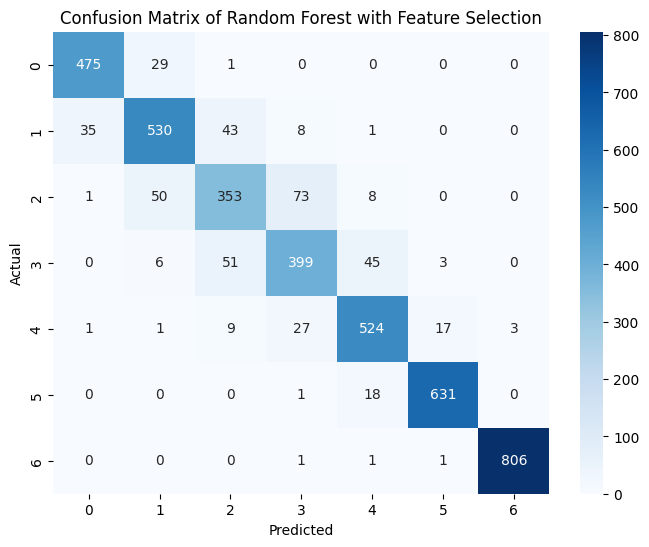

In [19]:
plot_confusion_matrix(y_test, y_predict2, 'Confusion Matrix of Random Forest with Feature Selection')

### Step 5 | Retrain Random Forest with feature selection by Decision Tree with tuning hyperparameters

In [20]:
selected_features = ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'CALC']

In [21]:
X_train_select = X_train[selected_features]
X_test_select = X_test[selected_features]

In [22]:
retrain_rf = RandomForestClassifier(criterion = 'entropy', max_depth = None, max_features = 'sqrt', n_estimators = 900)
retrain_rf.fit(X_train_select, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=900)

In [23]:
print(classification_report(y_train, retrain_rf.predict(X_train_select), digits=4))

              precision    recall  f1-score   support

           0     0.9956    0.9985    0.9970      2018
           1     0.9963    0.9951    0.9957      2465
           2     0.9928    0.9949    0.9938      1942
           3     0.9975    0.9950    0.9963      2018
           4     0.9991    0.9987    0.9989      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    0.9997    0.9998      3237

    accuracy                         0.9977     16606
   macro avg     0.9973    0.9974    0.9974     16606
weighted avg     0.9977    0.9977    0.9977     16606



In [24]:
y_predict = retrain_rf.predict(X_test_select)
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     0.9201    0.9347    0.9273       505
           1     0.8657    0.8671    0.8664       617
           2     0.8032    0.7320    0.7659       485
           3     0.7805    0.8115    0.7957       504
           4     0.8851    0.9003    0.8927       582
           5     0.9679    0.9738    0.9709       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8993      4152
   macro avg     0.8884    0.8880    0.8879      4152
weighted avg     0.8988    0.8993    0.8988      4152



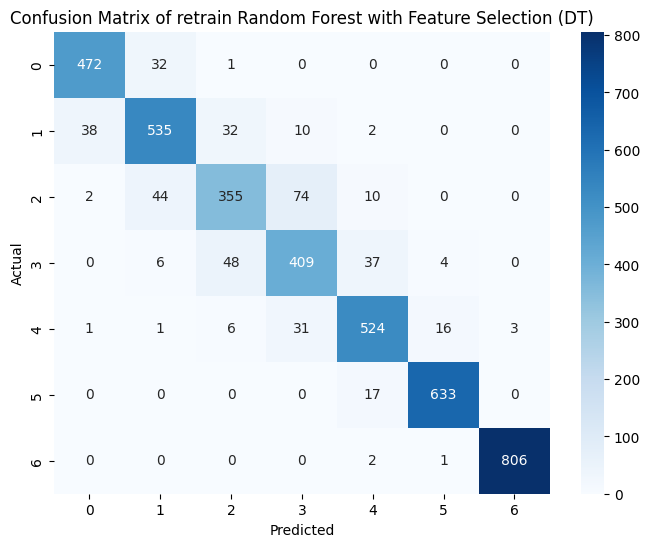

In [25]:
plot_confusion_matrix(y_test, y_predict, 'Confusion Matrix of retrain Random Forest with Feature Selection (DT)')